In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/datasets/dataset_B_05_2020.csv')
data=data.drop(['url'],axis=1)
print(data.head())

# x=np.array(data.drop(['status'],axis=1))
# y=data['status']
# y=[1 if y[i]=='legitimate' else -1 for i in range(len(y))]
# y=np.array(y)
# print(len(x[y==1]),len(x[y==-1]))
# train_x=x[y==1][1000:]
# train_x=np.append(train_x,x[y==-1][1000:],axis=0)
# train_y=x[y==0][1000:]


   length_url  length_hostname  ip  nb_dots  nb_hyphens  nb_at  nb_qm  nb_and  \
0          37               19   0        3           0      0      0       0   
1          77               23   1        1           0      0      0       0   
2         126               50   1        4           1      0      1       2   
3          18               11   0        2           0      0      0       0   
4          55               15   0        2           2      0      0       0   

   nb_or  nb_eq  ...  domain_in_title  domain_with_copyright  \
0      0      0  ...                0                      1   
1      0      0  ...                1                      0   
2      0      3  ...                1                      0   
3      0      0  ...                1                      0   
4      0      0  ...                0                      1   

   whois_registered_domain  domain_registration_length  domain_age  \
0                        0                          45    

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('status', axis=1), data['status'], test_size=0.2, random_state=42, stratify=data['status'])


In [ ]:
print("Train set shape:", X_train.shape, X_test.shape)
y_train=np.array(y_train)
y_test=np.array(y_test)
y_train=np.array([1 if y_train[i]=='legitimate' else -1 for i in range(len(y_train))])
y_test=np.array([1 if y_test[i]=='legitimate' else -1 for i in range(len(y_test))])
X_train=np.array(X_train)
X_test=np.array(X_test)
print("Test set shape:",y_train.shape, y_test.shape)
print("Train set shape:", X_train.shape, X_test.shape)

x_train_t=X_train.T

Train set shape: (9144, 87) (2286, 87)
Test set shape: (9144,) (2286,)
Train set shape: (9144, 87) (2286, 87)


In [ ]:
print(x_train_t.shape)
midpts=[]
classifies=[[],[],[],[],[]]
for i in range(X_train.shape[1]):
  values=sorted(list(set(x_train_t[i])))
  # print(values[0],values[10000])
  mdpt=[]
  for j in range(len(values)-1):
    mdpt.append((values[j]+values[j+1])/2)
  print(len(mdpt))
  midpts.append(mdpt)

(87, 9144)
292
75
1
17
23
4
3
14
0
15
16
1
20
20
1
5
4
14
3
8
2
6
1
4
1
1245
215
1
1
1
1
1
2
1
1
1
1
6
1
51
50
24
33
29
111
46
111
803
163
682
8
1
1
1
1
2
641
2651
2651
0
29
0
767
0
553
1
1
433
0
427
427
0
1
1
940
1
1
1
1
1
1
1509
3851
3933
1
1
10


In [ ]:
print(sum([len(i) for i in midpts]))

22979


In [ ]:
print(y_train)

[ 1 -1 -1 ... -1 -1 -1]


In [ ]:
classifies=[]
for i in range(len(x_train_t)):
  values=sorted([(X_train[j][i],j) for j in range(len(y_train))], key=lambda x: x[0])
  a=0
  b=0
  classify={1:[],-1:[]}
  classifies1=[]
  while(a<len(values) and b<len(midpts[i])):
    if values[a][0]<midpts[i][b]:
      classify[y_train[values[a][1]]].append(values[a][1])
      a+=1
    else:
      classify[1]=np.array(classify[1])
      classify[-1]=np.array(classify[-1])


      classifies1.append(classify)
      classify={1:[j for j in classify[1]],-1:[j for j in classify[-1]]}
      b+=1
  while(b<len(midpts[i])):
    classify[1]=np.array(classify[1])
    classify[-1]=np.array(classify[-1])

    classifies1.append(classify)
    b+=1
  classifies2=[]
  a=len(values)-1
  b=len(midpts[i])-1
  classify={1:[],-1:[]}
  while(a>=0 and b>=0):
    if values[a][0]>=midpts[i][b]:
      classify[y_train[values[a][1]]].append(values[a][1])
      a-=1
    else:
      classify[1]=np.array(classify[1])
      classify[-1]=np.array(classify[-1])

      classifies2.append(classify)
      classify={1:[j for j in classify[1]],-1:[j for j in classify[-1]]}
      b-=1
  while(b>=0):
    classify[1]=np.array(classify[1])
    classify[-1]=np.array(classify[-1])

    classifies2.append(np.array(classify))
    b-=1
  classifies2=classifies2[::-1]
  classifies.append([(classifies1[j],classifies2[j]) for j in range(len(classifies1))])






In [ ]:
print(len(classifies[0]),len(midpts[0]))

292 292


In [ ]:
w=[1/len(y_train),]*len(y_train)
w=np.array(w)
# print(classifies[0][0],classifies[0][5000])
print(X_train.shape)
def boost(yT,w,splits,midpts,lab):
  # print(set(w))
  min_l=[np.inf,0,0,0,0]
  for i in range(yT.shape[1]):
    for j in range(len(midpts[i])):
      # print(len(classifies[i]),i)
      classify=classifies[i][j]

      p=1 if len(classify[0][1])>len(classify[0][-1]) else -1
      q=1 if len(classify[1][1])>len(classify[1][-1]) else -1
      # print(w.shape,classify[1][(-1)*q])
      miss= 0 if len(classify[1][(-1)*q])==0  else np.sum(w[classify[1][(-1)*q]])
      miss+=0 if len(classify[0][(-1)*p])==0  else np.sum(w[classify[0][(-1)*p]])
      l=miss/np.sum(w)
      # print(l)
      if l<min_l[0]:
        min_l=[l,i,midpts[i][j],p,q]
  alpha=(1-min_l[0])/min_l[0]

  # print(alpha)
  dim,cut,p,q=min_l[1:]
  cnt=0

  for i in range(len(lab)):
    # print(len(lab),dim,i,yT.shape)
    if (yT[i][dim]>=cut  and lab[i]!=q) or (yT[i][dim]<cut  and lab[i]!=p):
      cnt+=1
      w[i] = w[i]*alpha
  # print(cnt,len(w),set(w))
  min_l.append(alpha)
  splits.append(min_l[1:])
splits=[]
for i in range(300):
  # print(i)
  # print(set(w))
  boost(X_train,w,splits,midpts,y_train)
  print(i)


print(splits)







(9144, 87)
[85, 0.5, 1, -1, 6.575807787903894]
[86, 2.5, -1, 1, 3.243096357454494]
[56, 36.5, -1, 1, 2.810355479200443]
[20, 0.5, -1, 1, 2.2702693322146694]
[6, 0.5, 1, -1, 2.0210794443604727]
[78, 0.5, 1, -1, 1.6284493383281424]
[50, 0.5, 1, -1, 1.5920262167872687]
[4, 2.5, -1, 1, 1.6779882225450615]
[86, 0.5, -1, 1, 1.569024344804341]
[62, 0.3788443615, -1, 1, 1.4712704060083344]
[25, 0.018693222000000002, 1, -1, 1.5017098726306766]
[58, 0.6878747000000001, 1, -1, 1.37514413439369]
[82, 8349.5, -1, 1, 1.4887309192053786]
[44, 15.5, 1, -1, 1.4218916411265208]
[56, 127.5, -1, 1, 1.272779731793624]
[57, 0.928486192, 1, -1, 1.3730646447587769]
[83, 5.0, -1, 1, 1.2643857464851522]
[51, 0.5, -1, 1, 1.2579801670065645]
[26, 0.0083333335, 1, -1, 1.3025337216692807]
[39, 1.5, 1, -1, 1.2944147653083327]
[50, 0.5, 1, -1, 1.281906872508516]
[4, 2.5, -1, 1, 1.2350053464858883]
[58, 0.7218706045000001, 1, -1, 1.26590936543795]
[70, 83.66666666500001, -1, 1, 1.2256154446111138]
[35, 0.5, 1, -1, 1.2

In [ ]:
for i in range(200):
  # print(i)
  # print(set(w))
  boost(X_train,w,splits,midpts,y_train)
  print(i,splits[-1])

0 [0, 161.5, 1, -1, 1.0382421970140532]
1 [4, 5.5, -1, 1, 1.0390868214579374]
2 [50, 2.5, 1, -1, 1.0372593948415734]
3 [62, 1.230769231, -1, 1, 1.0384363628283972]
4 [62, 0.678409091, 1, -1, 1.0389501694169423]
5 [43, 3.5, -1, 1, 1.033474453656571]
6 [43, 1.5, 1, -1, 1.032816173429231]
7 [40, 0.5, -1, 1, 1.0370979481813354]
8 [62, 0.6440092165, -1, 1, 1.0293342789586624]
9 [84, 0.5, 1, -1, 1.0360711829740978]
10 [37, 1.5, -1, 1, 1.0384644033683286]
11 [37, 2.5, 1, -1, 1.033254235535163]
12 [19, 2.5, -1, 1, 1.0384207877978864]
13 [0, 138.5, 1, -1, 1.0388766041695026]
14 [10, 5.5, -1, 1, 1.0378639560062337]
15 [30, 0.5, 1, -1, 1.0377574205036881]
16 [62, 1.230769231, -1, 1, 1.0376000562581216]
17 [17, 1.5, 1, -1, 1.0378614768575847]
18 [82, 9342.0, -1, 1, 1.0377621492114575]
19 [64, 0.6141439205, 1, -1, 1.0379377739663582]
20 [40, 118.5, -1, 1, 1.035743924479715]
21 [3, 4.5, 1, -1, 1.0372165921406253]
22 [40, 118.5, -1, 1, 1.0358474229151413]
23 [54, 0.5, 1, -1, 1.0367982877574955]
24 [1

In [ ]:
print(len(splits))

500


[[85, 0.5, 1, -1, 6.575807787903894], [86, 2.5, -1, 1, 3.243096357454494], [56, 36.5, -1, 1, 2.810355479200443], [20, 0.5, -1, 1, 2.2702693322146694], [6, 0.5, 1, -1, 2.0210794443604727], [78, 0.5, 1, -1, 1.6284493383281424], [50, 0.5, 1, -1, 1.5920262167872687], [4, 2.5, -1, 1, 1.6779882225450615], [86, 0.5, -1, 1, 1.569024344804341], [62, 0.3788443615, -1, 1, 1.4712704060083344], [25, 0.018693222000000002, 1, -1, 1.5017098726306766], [58, 0.6878747000000001, 1, -1, 1.37514413439369], [82, 8349.5, -1, 1, 1.4887309192053786], [44, 15.5, 1, -1, 1.4218916411265208], [56, 127.5, -1, 1, 1.272779731793624], [57, 0.928486192, 1, -1, 1.3730646447587769], [83, 5.0, -1, 1, 1.2643857464851522], [51, 0.5, -1, 1, 1.2579801670065645], [26, 0.0083333335, 1, -1, 1.3025337216692807], [39, 1.5, 1, -1, 1.2944147653083327], [50, 0.5, 1, -1, 1.281906872508516], [4, 2.5, -1, 1, 1.2350053464858883], [58, 0.7218706045000001, 1, -1, 1.26590936543795], [70, 83.66666666500001, -1, 1, 1.2256154446111138], [35, 0

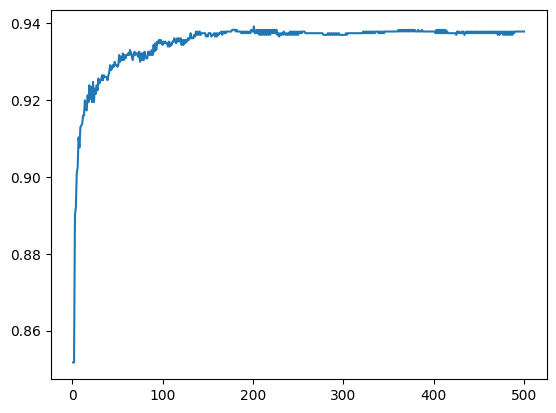

In [ ]:
plt_x=[]
plt_y=[]
print(splits)

# print(set(splits[i][0] for i in range(300)))
print(X_test.shape)
best_tree_split=[]
corrects=[0,]*len(splits)
tp=0
tn=0
fp=0
fn=0
for i in range(len(y_test)):
  g=0
  for j in range(len(splits)):
    dim,cut,p,q,alpha=splits[j]
    alpha=np.log(alpha)
    if(X_test[i][dim]<=cut):
      g+=alpha*p
    else:
      g+=alpha*q
    pred=np.sign(g)
    if pred==y_test[i]:
      corrects[j]+=1

plt_y=[corrects[i]/len(y_test) for i in range(len(splits)) ]
plt_x=[i+1 for i in range(len(splits))]

max_accu=0
max_idx=-1
for i in range(len(plt_y)):
  if max_accu<plt_y[i]:
    max_idx=i
    max_accu=plt_y[i]
print(max_accu,max_idx)

plt.plot(np.array(plt_x), np.array(plt_y))
plt.show()

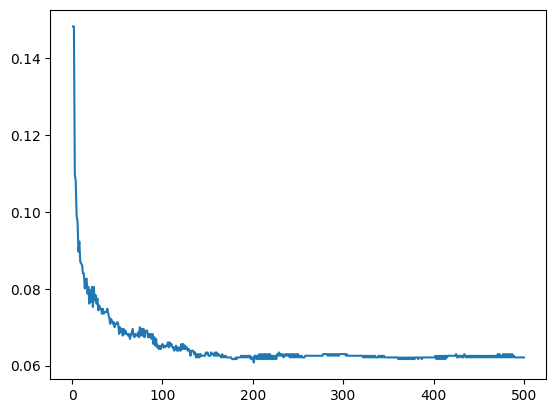

In [ ]:
plt_y=[1-i for i in plt_y]
plt.plot(np.array(plt_x), np.array(plt_y))

In [ ]:
plt_x=[]
plt_y=[]
print(splits)

# print(set(splits[i][0] for i in range(300)))
print(X_test.shape)
best_tree_split=[]
corrects=[0,]*300
tp=0
tn=0
fp=0
fn=0
print(max_idx)
for i in range(len(y_test)):
  g=0

  for j in range(max_idx+1):
    dim,cut,p,q,alpha=splits[j]
    alpha=np.log(alpha)
    if(X_test[i][dim]<=cut):
      g+=alpha*p
    else:
      g+=alpha*q
  pred=np.sign(g)
  if pred==y_test[i]:
    if pred==1:
      tp+=1
    else:
      tn+=1
  else:
    if pred==1:
      fp+=1
    else:
      fn+=1
precision=tp/(tp+fp)
recall=tp/(tp+fn)
print("Precision:",precision*100,"%")
print("Recall:",recall*100,"%")
print("F1-Score:",100*2*precision*recall/(precision+recall),"%")
print("Accuracy:",100*(tp+tn)/len(y_test),"%")

[[85, 0.5, 1, -1, 6.575807787903894], [86, 2.5, -1, 1, 3.243096357454494], [56, 36.5, -1, 1, 2.810355479200443], [20, 0.5, -1, 1, 2.2702693322146694], [6, 0.5, 1, -1, 2.0210794443604727], [78, 0.5, 1, -1, 1.6284493383281424], [50, 0.5, 1, -1, 1.5920262167872687], [4, 2.5, -1, 1, 1.6779882225450615], [86, 0.5, -1, 1, 1.569024344804341], [62, 0.3788443615, -1, 1, 1.4712704060083344], [25, 0.018693222000000002, 1, -1, 1.5017098726306766], [58, 0.6878747000000001, 1, -1, 1.37514413439369], [82, 8349.5, -1, 1, 1.4887309192053786], [44, 15.5, 1, -1, 1.4218916411265208], [56, 127.5, -1, 1, 1.272779731793624], [57, 0.928486192, 1, -1, 1.3730646447587769], [83, 5.0, -1, 1, 1.2643857464851522], [51, 0.5, -1, 1, 1.2579801670065645], [26, 0.0083333335, 1, -1, 1.3025337216692807], [39, 1.5, 1, -1, 1.2944147653083327], [50, 0.5, 1, -1, 1.281906872508516], [4, 2.5, -1, 1, 1.2350053464858883], [58, 0.7218706045000001, 1, -1, 1.26590936543795], [70, 83.66666666500001, -1, 1, 1.2256154446111138], [35, 0